<a href="https://colab.research.google.com/github/KendallScott/Machine-Learning/blob/main/SVM%20and%20LR/forestCoverLogReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from google.colab import files

pd.set_option('display.max_columns',None)

# Reading and cleaning the data

In [3]:
# forest_cover_type = files.upload()

forest_cover_type = pd.read_csv("covtype 3.csv")
forest_cover_type.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


#### Renaming wilderness areas

In [4]:
forest_cover_type.rename(columns={'Wilderness_Area1':'Rawah','Wilderness_Area2':'Neota','Wilderness_Area3':'Comanche Peak','Wilderness_Area4':'Cache la Poudre'},inplace=True)
forest_cover_type.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Rawah,Neota,Comanche Peak,Cache la Poudre,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


#### The code below is used to turn categorical variables into individual columns (how the data was when we downloaded it) I kept it here for now for reference or if we change datasets

In [ ]:
#tmpSoil = pd.get_dummies(forest_cover_type.Soil_Type,prefix='Soil')
#forest_cover_type = pd.concat((forest_cover_type,tmpSoil),axis=1)
#tmpWild = pd.get_dummies(forest_cover_type.Wilderness_Area,prefix='Area')
#forest_cover_type = pd.concat((forest_cover_type,tmpWild),axis=1)

#### Creating a new dataset that only contains the most common cover types

In [5]:
forestDF = forest_cover_type[(forest_cover_type['Cover_Type']==1) | (forest_cover_type['Cover_Type']==2)]

#### Renaming cover type to actual names

We could skip the next couple steps and just leave cover type as 1 and 2 and everything should work. Left it like this for workflow/reference.

In [6]:
# this isnt necessary but maybe helpful for plotting or seeing which cover types are use
forestDF = forestDF.astype({'Cover_Type':'string'})
forestDF['Cover_Type'] = forestDF['Cover_Type'].str.replace('1','Spruce/Fir')
forestDF['Cover_Type'] = forestDF['Cover_Type'].str.replace('2','Lodgepole Pine')
forestDF['Cover_Type'].describe().transpose()

count             495141
unique                 2
top       Lodgepole Pine
freq              283301
Name: Cover_Type, dtype: object

#### Coding Lodgepole Pine as 1 and Spruce/Fir as 0

In [7]:
# Lodgepole Pine = 1 | Spruce/Fir = 0
forestDF['treeType'] = forestDF.Cover_Type=='Lodgepole Pine'
forestDF.treeType = forestDF.treeType.astype(np.int64)

#### Deleting original cover type column

In [8]:
if 'Cover_Type' in forestDF:
    del forestDF['Cover_Type']

# Logistic Regression

### Splitting the data between response and predictors

In [9]:
if 'treeType' in forestDF:
    Y = forestDF['treeType'].values
    del forestDF['treeType']
    X = forestDF.values

### Creating cross validation object

In [10]:
num_cv_iter = 10
num_instances = len(Y)
cv_object = ShuffleSplit(n_splits=num_cv_iter,test_size=0.2)
print(cv_object)

ShuffleSplit(n_splits=10, random_state=None, test_size=0.2, train_size=None)


### Creating logistic regression object

In [11]:
lr_clf = LogisticRegression(penalty='l2',C=1.0,class_weight=None)

### Running logistic regression on 3 random test/train splits

In [12]:
iter_num = 0

for iter_num, (train_indices,test_indices) in enumerate(cv_object.split(X,Y)):
    lr_clf.fit(X[train_indices],Y[train_indices])
    y_hat = lr_clf.predict(X[test_indices])
    
    print('****Iteration',iter_num,'****')
    print('Accuracy',mt.accuracy_score(Y[test_indices],y_hat))
    print('Confusion Matrix \n',mt.confusion_matrix(Y[test_indices],y_hat))
    

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 0 ****
Accuracy 0.7590099869735129
Confusion Matrix 
 [[29458 12784]
 [11081 45706]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 1 ****
Accuracy 0.7539306667743793
Confusion Matrix 
 [[29574 13038]
 [11330 45087]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 2 ****
Accuracy 0.7582930252754244
Confusion Matrix 
 [[29444 12618]
 [11318 45649]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 3 ****
Accuracy 0.7458825192620343
Confusion Matrix 
 [[28848 13471]
 [11694 45016]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 4 ****
Accuracy 0.7566672388896182
Confusion Matrix 
 [[29415 13095]
 [11002 45517]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 5 ****
Accuracy 0.7577679265669652
Confusion Matrix 
 [[29427 12782]
 [11206 45614]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 6 ****
Accuracy 0.7429540841571661
Confusion Matrix 
 [[28737 13740]
 [11715 44837]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 7 ****
Accuracy 0.7579597895565945
Confusion Matrix 
 [[29427 13210]
 [10759 45633]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 8 ****
Accuracy 0.7470942855123247
Confusion Matrix 
 [[28068 14355]
 [10690 45916]]
****Iteration 9 ****
Accuracy 0.7599592038695736
Confusion Matrix 
 [[29624 12437]
 [11334 45634]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(lr_clf, X, y=Y, cv=cv_object) # this also can help with parallelism
print(accuracies)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[0.74409516 0.74265114 0.74324693 0.74199477 0.76002989 0.75198174
 0.75673793 0.75614214 0.75512224 0.75855557]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Looking at weights of model

In [13]:
weights = lr_clf.coef_.T
varNames = forestDF.columns
for coef, name in zip(weights,varNames):
    print(name,'has weight of',coef[0])

Elevation has weight of -0.0076795242952405855
Aspect has weight of -0.00037642178343367546
Slope has weight of 0.1179228318581675
Horizontal_Distance_To_Hydrology has weight of 0.002196448171234879
Vertical_Distance_To_Hydrology has weight of 0.00015285026769809972
Horizontal_Distance_To_Roadways has weight of 7.1647363162647e-05
Hillshade_9am has weight of 0.0693188892693275
Hillshade_Noon has weight of -0.001582330472707639
Hillshade_3pm has weight of 0.047368683683252186
Horizontal_Distance_To_Fire_Points has weight of 1.430328956649923e-05
Rawah has weight of -9.89861751744279e-05
Neota has weight of -0.0005599738266459282
Comanche Peak has weight of 0.0017705012656707385
Cache la Poudre has weight of 0.00014265007904570276
Soil_Type1 has weight of 0.0
Soil_Type2 has weight of 3.126005293024977e-05
Soil_Type3 has weight of 4.29536763618547e-05
Soil_Type4 has weight of 0.00011186164375256766
Soil_Type5 has weight of 0.0
Soil_Type6 has weight of 2.7482312838724102e-05
Soil_Type7 has

### Scaling the weights for interpretability

In [14]:
sclObj = StandardScaler()
sclObj.fit(X[train_indices])

X_trainScaled = sclObj.transform(X[train_indices])
x_testScaled = sclObj.transform(X[test_indices])

lrs_clf = LogisticRegression(penalty='l2',C=0.05)
lrs_clf.fit(X_trainScaled,Y[train_indices])

y_hatS = lrs_clf.predict(x_testScaled)

acc = mt.accuracy_score(Y[test_indices],y_hatS)
conf = mt.confusion_matrix(Y[test_indices],y_hatS)
print('accuracy:',acc)
print(conf)

zipVars = zip(lrs_clf.coef_.T,forestDF.columns)
zipVars = sorted(zipVars)

for coef, name in zipVars:
    print(name,'has weight of', coef[0])
    

accuracy: 0.7760151066859203
[[30260 11801]
 [10380 46588]]
Elevation has weight of -1.6760805167297896
Hillshade_3pm has weight of -0.4555325273581073
Soil_Type22 has weight of -0.2090069142631401
Soil_Type39 has weight of -0.20220601638956706
Hillshade_9am has weight of -0.18334408721493345
Soil_Type23 has weight of -0.18101596928942207
Soil_Type21 has weight of -0.12967522808371873
Soil_Type38 has weight of -0.11808650509207445
Soil_Type35 has weight of -0.11133675967322029
Soil_Type20 has weight of -0.1003858059530308
Soil_Type9 has weight of -0.0878472866401428
Soil_Type40 has weight of -0.0869515455804206
Comanche Peak has weight of -0.08188096071618993
Horizontal_Distance_To_Fire_Points has weight of -0.051440252257388436
Rawah has weight of -0.04592160179703428
Soil_Type19 has weight of -0.043251755209117844
Soil_Type16 has weight of -0.03791504038002652
Soil_Type17 has weight of -0.02551926636339897
Soil_Type27 has weight of -0.00957284916187334
Soil_Type24 has weight of -0.00

### Plotting weights because probably useful (scaled weights)

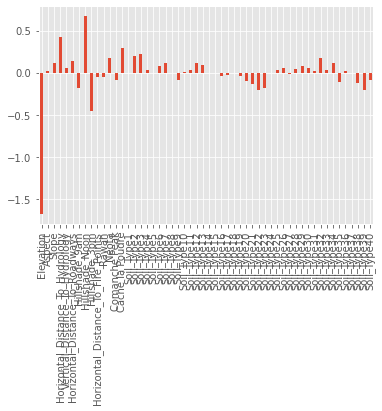

In [15]:
%matplotlib inline
plt.style.use('ggplot')
weights = pd.Series(lrs_clf.coef_[0],index=forestDF.columns)
weights.plot(kind='bar')
plt.show()

### after this in the notebook i was following he goes over stuff to remove related variables to help with overfitting

# Support Vector Machine

### Creating and running the SVM using the scaled and split sets from earlier

### do not run, it isnt finishing for some reason and breaks the whole notebook

In [ ]:
#svm_clf = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto')
#svm_clf.fit(X_trainScaled,Y[train_indices])


test


In [ ]:


#y_hatSVM = svm_clf.predict(X_testScaled)

#acc = mt.accuracy_score(Y[test_indices],y_hatSVM)
#conf = mt.confusion_matrix(Y[test_indices],y_hatSVM)
#print('accuracy:',acc)
#print(conf)


In [18]:
##SVM

for train_indices, test_indices in cv_object.split(X,Y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = Y[train_indices]
    
    X_test = X[test_indices]
    y_test = Y[test_indices]

X_train_scaled = sclObj.transform(X_train) # apply to training
X_test_scaled = sclObj.transform(X_test)



In [ ]:
# lets investigate SVMs on the data and play with the parameters and kernels
from sklearn.svm import SVC

# train the model just as before
svm_clf = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto') # get object
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)